## Example Notebook

First import the Dual class from the dual_autodiff package, the Dual class houses all the functionality required to use Dual numbers

In [22]:
#import package
from dual_autodiff import Dual

In [26]:
"string" == Dual(1,0)

TypeError: invalid object for comparison <class 'str'>

Initialise our Dual number object, giving it a real and a dual part.  The real and dual parts may be either integers or floating point numbers

In [4]:
# Initialising Dual numbers
dual_number_1 = Dual(1,2)
dual_number_2 = Dual(3.5, 4.5)

print(dual_number_1)
print(dual_number_2)

Dual(real = 1, dual = 2)
Dual(real = 3.5, dual = 4.5)


In [5]:
# Attempting to initialise with a non int or float object will result in error
try:
    d = Dual("string", 1) 
except TypeError as e:
    print("An error occurred:")
    print(e)

An error occurred:
real component must be either a float or an integer


The dual_autodiff package covers a wide array of operations suitable for scientific computing, such as arithmetic operations, trigonometric operations, logarithms and exponentials. Moreoever the Dual autodiff package handles (where appropriate) cases when a dual number object is being operated with a scalar. In such cases the scalar object is treated as a dual number with a 0 dual part.

Formulas for the operations may be seen in the Dual Class Documentation or in the referances provided

### Arithemetic operations example

In [6]:
dual_number_3 = dual_number_1 + dual_number_2
print(dual_number_3)

Dual(real = 4.5, dual = 6.5)


In [7]:
dual_number_4 = dual_number_1 * dual_number_2
print(dual_number_4)

Dual(real = 3.5, dual = 11.5)


In [8]:
dual_number_5 = dual_number_1 /dual_number_2
print(dual_number_5)

Dual(real = 0.2857142857142857, dual = 0.20408163265306123)


In [9]:
dual_number_6 = dual_number_1 ** dual_number_2
print(dual_number_6)

Dual(real = 1.0, dual = 7.0)


As mentioned previously operations also work with scalars

In [10]:
dual_number_7 = 2 + dual_number_2
print(dual_number_7)

Dual(real = 5.5, dual = 4.5)


In [11]:
dual_number_8 = 2 / dual_number_2
print(dual_number_8)

Dual(real = 0.5714285714285714, dual = -0.7346938775510204)


In [12]:
dual_number_9 = dual_number_1 **2
print(dual_number_9)

Dual(real = 1, dual = 4)


One can also chain together these operations as one would expect of any numerical operators, following pythons standard rules for orders of operations

In [13]:
dual_number_10 = (dual_number_1 + dual_number_2) ** 2 / dual_number_4
print(dual_number_10)

Dual(real = 5.785714285714286, dual = -2.295918367346939)


### Trigonometric functions example

Trigonometric functions are also defined for dual numbers and are methods of the dual number instance taking the current instance as the argument to the method

In [14]:
# standard trig functions

sin = dual_number_1.sin()
cos = dual_number_1.cos()
tan = dual_number_1.tan()

print("The sine of {} is {}".format(dual_number_1, sin))
print("The cosine of {} is {}".format(dual_number_1, cos))
print("The tangent of {} is {}".format(dual_number_1, tan))

The sine of Dual(real = 1, dual = 2) is Dual(real = 0.8414709848078965, dual = 1.0806046117362795)
The cosine of Dual(real = 1, dual = 2) is Dual(real = 0.5403023058681398, dual = -1.682941969615793)
The tangent of Dual(real = 1, dual = 2) is Dual(real = 1.557407724654902, dual = 6.851037641629518)


These may also be chained, not that as the mathematical functions are actually methods of the dual object the order these operations are apllied when chained together are "inside out"

Thus if one wants to find 

$$
\tan(\cos(\sin(Dual))), 
$$

One would do the below

In [15]:
x = dual_number_1.sin().cos().tan()
print(x)

Dual(real = 0.786357394978223, dual = -1.3039512770666613)


### Hyperbolic functions example

Hyperbolic functions are also defined

In [16]:
# standard hypervolic trig functions

sinh = dual_number_1.sinh()
cosh = dual_number_1.cosh()
tanh = dual_number_1.tanh()

print("The sine of {} is {}".format(dual_number_1, sinh))
print("The cosine of {} is {}".format(dual_number_1, cosh))
print("The tangent of {} is {}".format(dual_number_1, tanh))

The sine of Dual(real = 1, dual = 2) is Dual(real = 1.1752011936438014, dual = 3.0861612696304874)
The cosine of Dual(real = 1, dual = 2) is Dual(real = 1.5430806348152437, dual = 2.3504023872876028)
The tangent of Dual(real = 1, dual = 2) is Dual(real = 0.7615941559557649, dual = 0.8399486832280524)


### Exponentials example

Natural Logarithms and exponentials are also defined in the Dual class. Akin to other mathematic functions in this module, log and exp are methods of the class and take in the current instance as the argument  

In [17]:
ln = dual_number_1.log()
exp = dual_number_1.exp()

print("ln({}) = {}".format(dual_number_1, sinh))
print("exp({}) = {}".format(dual_number_1, cosh))

ln(Dual(real = 1, dual = 2)) = Dual(real = 1.1752011936438014, dual = 3.0861612696304874)
exp(Dual(real = 1, dual = 2)) = Dual(real = 1.5430806348152437, dual = 2.3504023872876028)


The exponential and logarithm of dual numbers follow what one would expect 
$$
\ln(\exp(Dual)) = Dual, 
$$

Please note again the "inside out" of chaining methods

In [18]:
# natural log of an exponential
print(dual_number_1.exp().log())


Dual(real = 1.0, dual = 2.0)


### Comparison example

The comparison operator is defined to be true if two Dual numbers have the same real and the same dual components (withing a small tolerance to account for floating point error)

In [19]:
dual1 = Dual(1,1)
dual2 = Dual(1,1)

print(dual1 == dual2)

True


### Differentiation example

A key use case of dual numbers is in the case of autodifferentiation. where

$$
f(a + b\epsilon) = f(a) + f'(a) \, b\epsilon
$$

Thus by setting $b = 1$ we may compute function and its derivitive evaluated at a, to machine precision



In [20]:
import numpy as np
from matplotlib import pyplot as plt

# lets create an example function
def func(x):
    return x**3

# lets use our dual class to evalate this function and its derivitive 

# set our region we wish to consider
x = np.linspace(-2,2,100)

# initialising our dual numbers for our range, note we have a 1 dual element as we wish to find the derivitive
dual_numbers = [Dual((elem), 1) for elem in x]

# entering or dual numbers into the function over our desired range 
dual_number_outputs = [func(elem) for elem in dual_numbers]

# grabbing the real and dual elements of our dual numbers that are outputted from our function 
real_outputs = [elem.real for elem in dual_number_outputs]
dual_outputs = [elem.dual for elem in dual_number_outputs]


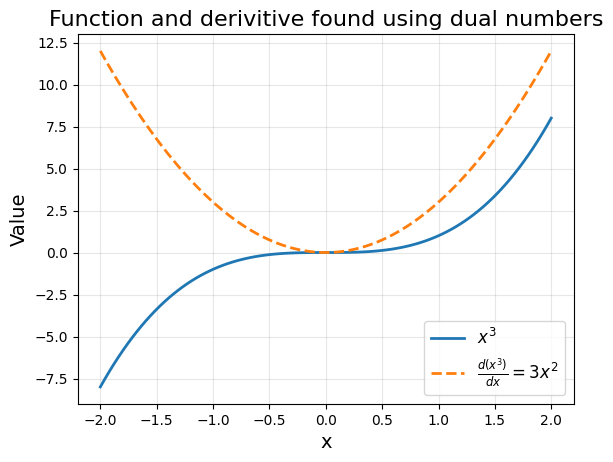

In [21]:
plt.plot(x, real_outputs, label="$x^3$", linewidth=2)
plt.plot(x, dual_outputs, label="$\\frac{d(x^3)}{dx} = 3x^2$", linestyle="--", linewidth=2)

plt.title("Function and derivitive found using dual numbers", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()